# 7 Chaos

erratic but fully deterministic behavior. Chaotic behavior cannot be predicted in quantitative detail but its overall form can be known.

## 7.1 Continuous time

We study the food chain model:

$$X' = X(1-X) - \frac{a_1 X}{1 + b_1X}Y$$

$$Y' = \frac{a_1X}{1 + b_1X}Y - d_1Y - \frac{a_2Y}{1 + b_2Y}Z$$

$$Z' = \frac{a_2 Y}{1 + b_2Y}Z - d_2Z$$

### 7.1.1 Simulate chaos

#### 7.1.1.1 simulate the model

Hiervoor nemen we $a_1 = 5$,$a_2 = 0.1$ $b_1 = 3$, $b_2 = 2$, $d_1 = 0.4$, $d_2 = 0.01$ met X=1,Y=0.5 en Z=8 als begincondities.

##### 7.1.1.1.1 Time series

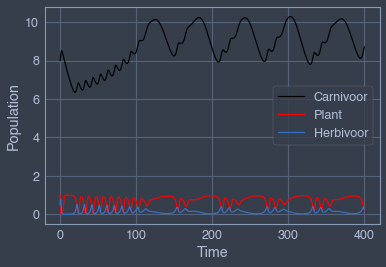

In [1]:
import matplotlib.pyplot as plt
import numpy as np
def vergelijkingen(X,Y,Z):
    X_ = X*(1 - X) - 5*X/(1 + 3*X)*Y
    Y_ = 5*X/(1 + 3*X)*Y - 0.4*Y - 0.1*Y/(1 + 2*Y)*Z
    Z_ = 0.1*Y/(1 + 2*Y)*Z - 0.01*Z
    return [X_,Y_,Z_]
T = np.arange(0,400,0.05)
def euler(X_init,Y_init,Z_init,stap=0.1,stappen=len(T)):
    x,y,z = [],[],[]
    Xaccent = X_init
    Yaccent = Y_init
    Zaccent = Z_init
    for _ in range(0,stappen):
        x.append(Xaccent)
        y.append(Yaccent)
        z.append(Zaccent)
        Xaccent += stap*vergelijkingen(x[-1],y[-1],z[-1])[0]
        Yaccent += stap*vergelijkingen(x[-1],y[-1],z[-1])[1]
        Zaccent += stap*vergelijkingen(x[-1],y[-1],z[-1])[2]
    return x,y,z
x,y,z = euler(1,0.5,8)
plt.plot(T,z,color='black',label='Carnivoor')
plt.plot(T,x,color='red',label='Plant')
plt.plot(T,y,color='b',label='Herbivoor')
plt.ylabel('Population')
plt.xlabel('Time')
plt.legend()
plt.show()

##### 7.1.1.1.2 Trajectory

<IPython.core.display.Javascript object>


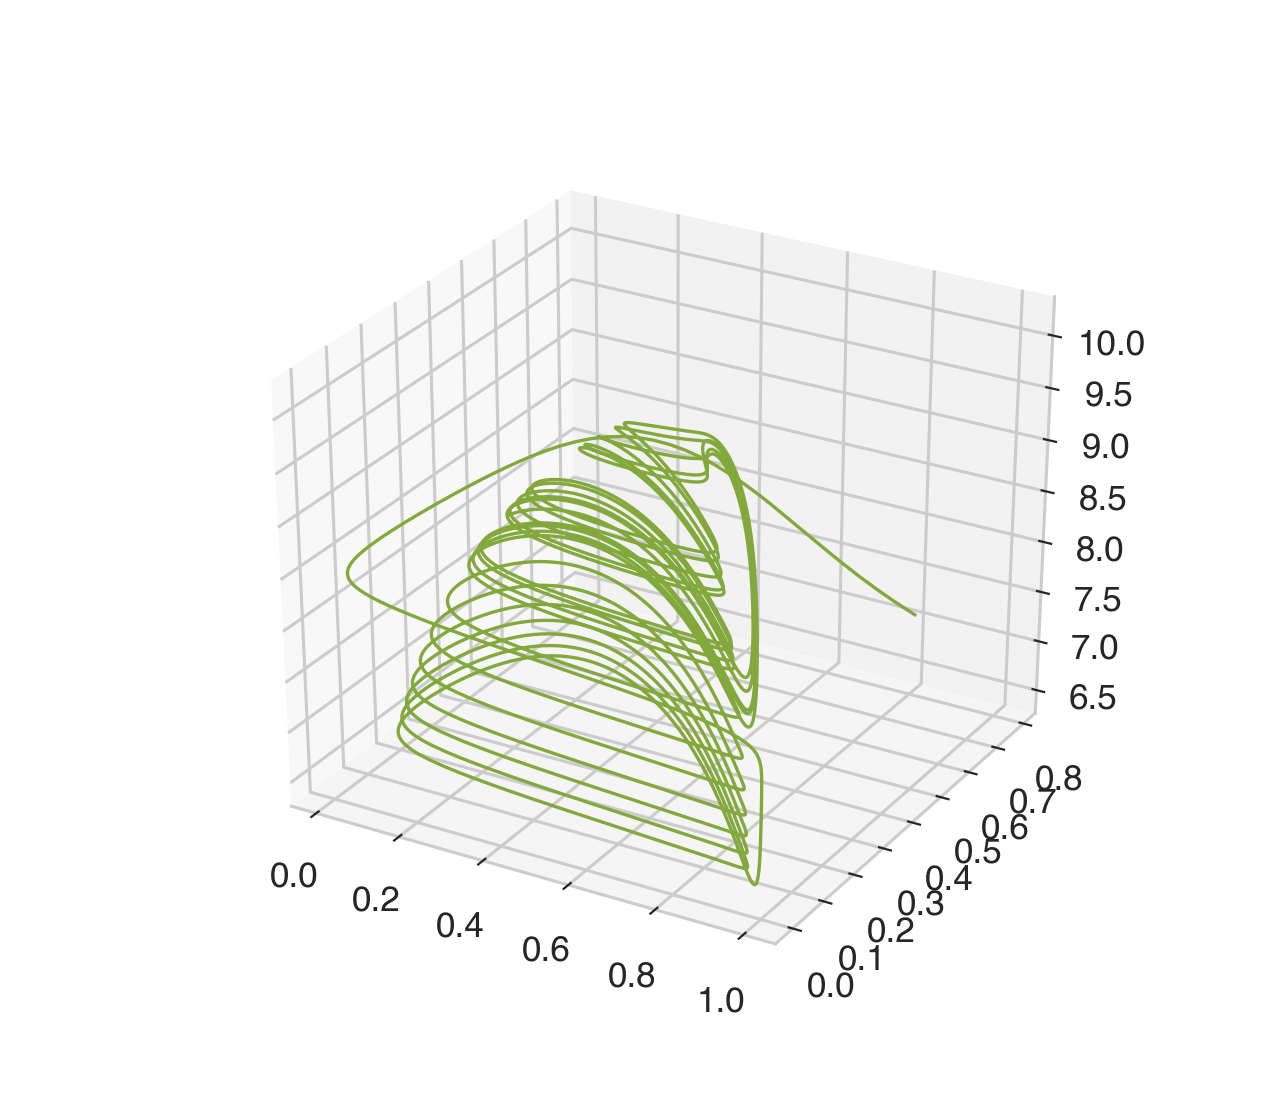

In [4]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z,color='g')
plt.show()

##### 7.1.1.2 Slightly different initial conditions

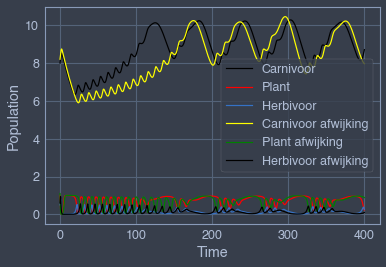

In [6]:
x_,y_,z_ = x,y,z = euler(1.1,0.6,8.2)
x,y,z = euler(1,0.5,8)

plt.plot(T,z,color='black',label='Carnivoor')
plt.plot(T,x,color='red',label='Plant')
plt.plot(T,y,color='b',label='Herbivoor')

plt.plot(T,z_,color='yellow',label='Carnivoor afwijking')
plt.plot(T,x_,color='green',label='Plant afwijking')
plt.plot(T,y_,color='black',label='Herbivoor afwijking')

plt.ylabel('Population')
plt.xlabel('Time')
plt.legend()
plt.show()

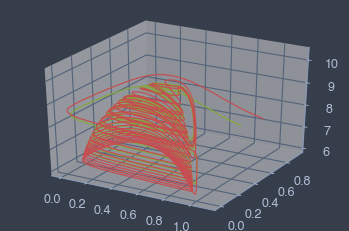

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z,color='g')
ax.plot(x_,y_,z_,color='r')
plt.show()

##### 7.1.1.2 distance

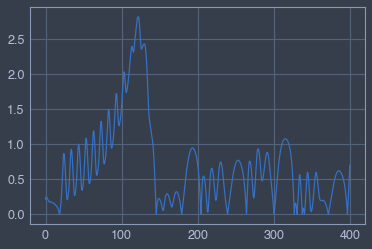

In [15]:
distance = []
x,y,z = np.array(x),np.array(y),np.array(z)
x_,y_,z_ = np.array(x_),np.array(y_),np.array(z_)
distance = np.abs(np.sqrt(x*x + y*y + z*z) - np.sqrt(x_*x_ + y_*y_ + z_*z_))
plt.plot(T,distance)
plt.show()

We zien hier nul regelmaat in

### 7.1.2 Transition to chaos

We nemen nu een initieel punt en laten $b_1$ van 2 naar 3 variëeren en plotten de output na enige transitietijd

In [ ]:
# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.plot(...)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,frames=20, interval=100)

In [ ]:
HTML(anim.to_jshtml())

## 7.2 Discrete time

Een van de makkelijkste voorbeelden van chaotisch gedrag is de discrete logistische vergelijking:
$$X_{N + 1} = rX_N(1-X_N)$$

### 7.2.1 Maximum waarde van r zodat X maximum 1 is

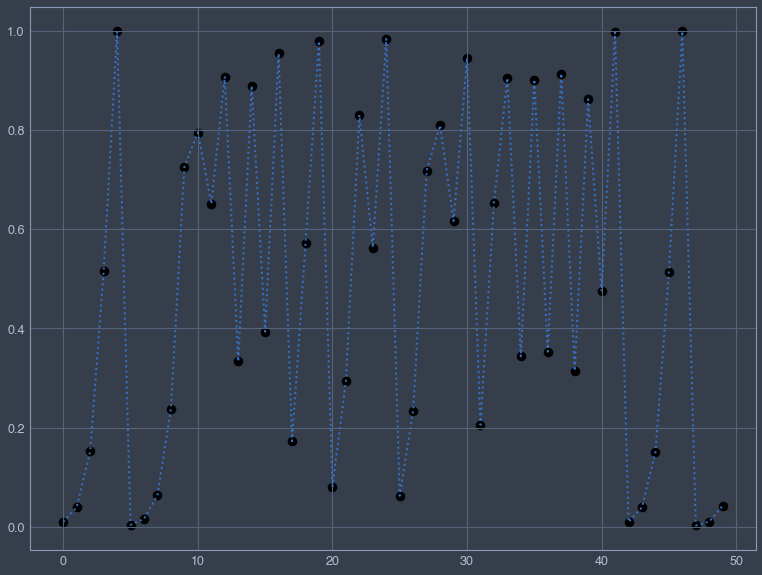

In [40]:
def vergelijking(X,r):
    return r*X*(1 - X)
T = np.arange(0,50,1)
X = np.zeros(50)
def stappen(initX,r,periode=len(T)):
    X[0] = initX
    for i in range(1,periode):
        X[i] = vergelijking(X[i-1],r)
    return X
X = stappen(0.01,4)
plt.figure(figsize=(13,10))
plt.plot(T,X,ls=('dotted'),lw='2',color = 'b')
plt.scatter(T,X,color = 'black',lw='4')
plt.show()

Dit lijkt 4 te zijn.

### 7.2.3 create a cobweb

Hierbij kiezen we het aantal iteraties, r en $X_0$

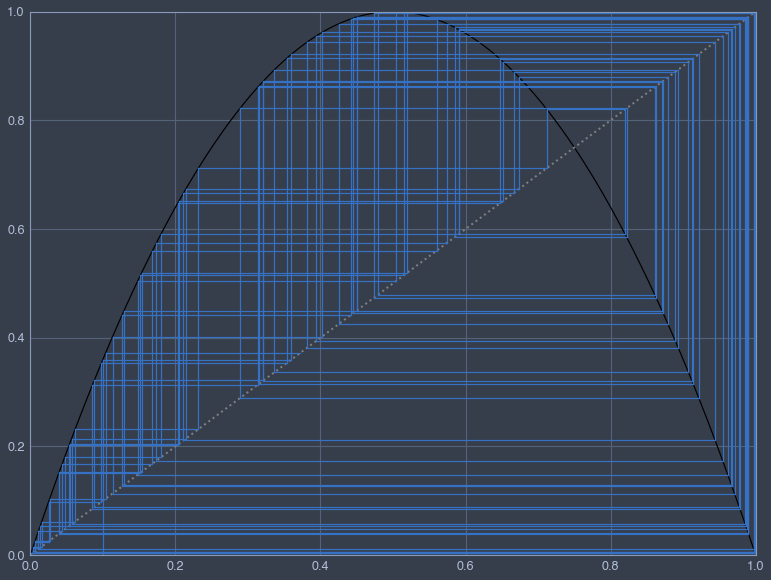

In [60]:
def vergelijking(X,r):
    return r*X*(1 - X)
T = np.arange(0,1,0.001)
X = vergelijking(T,4)
plt.figure(figsize=(13,10))
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(T,X,color = 'black')
plt.plot(T,T,ls=('dotted'),lw='2',color = 'grey')
def cobweb(stappen,X_init,r):
    X = []
    Y = []
    #begin:
    X.append(X_init)
    Y.append(0)
    for stap in range(stappen):
        Y.append(vergelijking(X[-1],r))
        X.append(X[-1])
        plt.plot(X[-2:],Y[-2:],color='b')
        X.append(Y[-1])
        Y.append(Y[-1])
        plt.plot(X[-2:],Y[-2:],color='b')
cobweb(100,0.1,4)
plt.show()

### 7.2.4 time-series

We breiden dit programma nu uit zodat het ook de tijds-serie weergeeft:

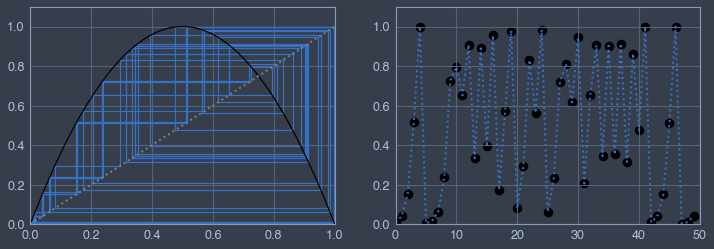

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))


#aanpasbare waardes:
r = 4
X_init = 0.01
stappen = 50

def cobweb(stappen,X_init,r):
    X = []
    Y = []
    #begin:
    X.append(X_init)
    Y.append(0)
    for stap in range(stappen):
        Y.append(vergelijking(X[-1],r))
        X.append(X[-1])
        ax1.plot(X[-2:],Y[-2:],color='b')
        X.append(Y[-1])
        Y.append(Y[-1])
        ax1.plot(X[-2:],Y[-2:],color='b')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1.1)
cobweb(stappen,X_init,r)
T = np.arange(0,1,0.001)
X = vergelijking(T,4)
ax1.plot(T,X,color = 'black')
ax1.plot(T,T,ls=('dotted'),lw='2',color = 'grey')

ax2.set_xlim(0,stappen)
ax2.set_ylim(0,1.1)
T = np.arange(0,stappen,1)
X = np.zeros(stappen)
def stappen(initX,r,periode=len(T)):
    X[0] = initX
    for i in range(1,periode):
        X[i] = vergelijking(X[i-1],r)
    return X
X = stappen(X_init,r)
ax2.plot(T,X,ls=('dotted'),lw='2',color = 'b')
ax2.scatter(T,X,color = 'black',lw='4')
plt.show()

### 7.2.5 equilibria

Welke equilibria treden er op voor 0>r>1, zijn ze stabiel of onstabiel?

$$X_{N+1} = rX_N - rX_N^2$$

De equilibria zijn gegeven door
$$X_{eq} = rX_{eq} - rX_{eq}^2 \Rightarrow 1 = r - rX_{eq} \Rightarrow X_{eq} = \frac{r-1}{r}$$

Nu kijken of ze stabiel zijn:

Het equilibrium is onstabiel als:

$$\left\lvert\frac{df}{dX}\right\rvert_{X_{eq}} > 1$$

En dus als:

$$1 < \left\lvert\frac{d(rX-rX^2)}{dX}\right\rvert_{X_{eq}} = \left\lvert r - 2rX_{eq}\right\rvert = \left\lvert r - 2(r-1)\right\rvert = \left\lvert 2 - r\right\rvert$$

En dus is ze onstabiel als $r < 1$ en als $r > 3$, dus enkel stabiel voor $1 < r < 2$

we skippen alle tussendoor aangezien de volgende figuur alles uitlegt:

### 7.2.9 Figure 5.21

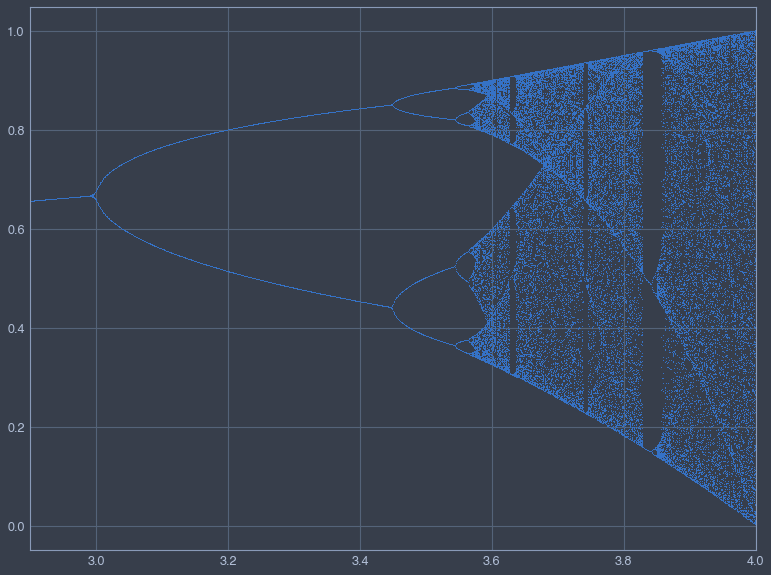

In [115]:
def vergelijking(X,r):
    return r*X*(1 - X)
rLijst = np.arange(2.9,4,0.001)
plt.figure(figsize=(13,10))
plt.xlim(2.9,4)
initX=0.1
for r in rLijst:
    T = np.arange(0,500,1)
    X = np.zeros(500)
    X[0] = initX
    for i in range(1,500):
        X[i] = vergelijking(X[i-1],r)
    X = np.unique(X[-50:])
    for x in X:
        plt.plot(r,x,',k',color='b',lw=5)
plt.show()

### 7.2.10 window: [3.82 , 3.86]

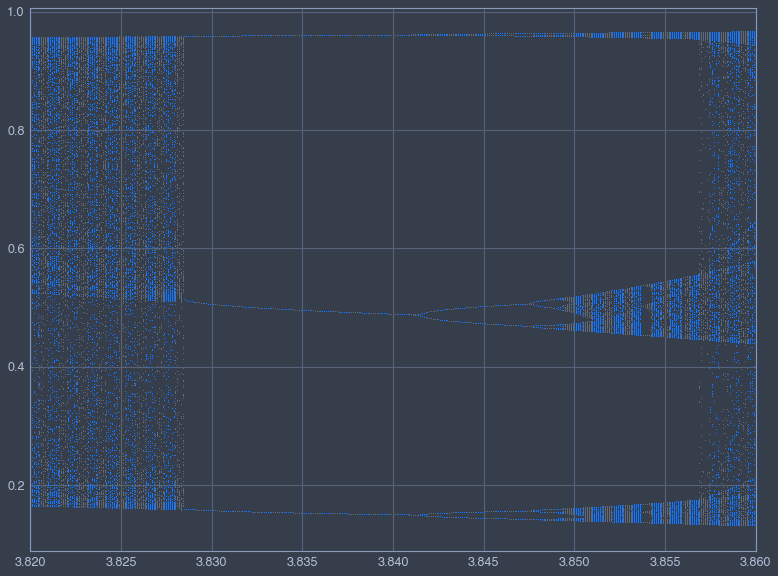

In [118]:
rLijst = np.arange(3.82,3.86,0.0001)
plt.figure(figsize=(13,10))
plt.xlim(3.82,3.86)
initX=0.1
for r in rLijst:
    T = np.arange(0,500,1)
    X = np.zeros(500)
    X[0] = initX
    for i in range(1,500):
        X[i] = vergelijking(X[i-1],r)
    X = np.unique(X[-200:])
    for x in X:
        plt.plot(r,x,',k',color='b',lw=5)
plt.show()

### 7.2.11 Initial conditions

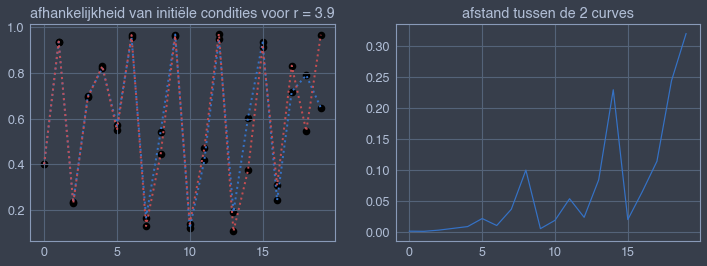

In [124]:
T = np.arange(0,20,1)
def stappen(initX,r,periode=len(T)):
    X = np.zeros(20)
    X[0] = initX
    for i in range(1,periode):
        X[i] = vergelijking(X[i-1],r)
    return X
X = stappen(0.4,3.9)
X_ = stappen(0.401,3.9)
afstand = np.abs(X-X_)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.plot(T,X,ls=('dotted'),lw='2',color = 'b',label='X_{init}=0.4')
ax1.plot(T,X_,ls=('dotted'),lw='2',color = 'r',label='X_{init}=0.401')
ax1.scatter(T,X,color = 'black',lw='2')
ax1.scatter(T,X_,color = 'black',lw='2')
ax1.set_title('afhankelijkheid van initiële condities voor r = 3.9')
ax2.plot(afstand)
ax2.set_title('afstand tussen de 2 curves')
plt.show()

We zien dat ze ongeveer gelijk beginnen maar al sterk divergeren na de $20^{ste}$ iteratie

## 7.3 Randomness versus chaos

### 7.3.1 The logistic equation

We zullen nu een 'Pointcaré plot' maken voor $r = 4$ met $X_0 = 0.4$, dit is een plot van $X_{t+1}$ tegen $X_t$

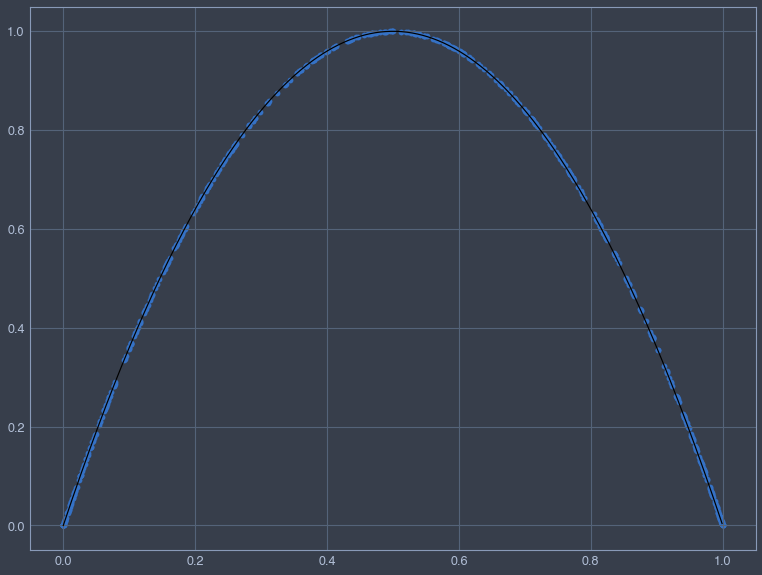

In [137]:
T = np.arange(0,500,1)
X = np.zeros(500)
X_ = np.arange(0,1,0.001)
f = 4*X_*(1-X_)
def stappen(initX,r,periode=len(T)):
    X[0] = initX
    for i in range(1,periode):
        X[i] = vergelijking(X[i-1],r)
    return X
X = stappen(0.4,4)
plt.figure(figsize=(13,10))
plt.scatter(X[:-1],X[1:])
plt.plot(X_,f,color='black')
plt.show()

We zien dat de waardes bekomen door $X_{t+1}$ tegen $X_t$ uit te drukken perfect overeenkomen met de waardes gevonden door $f(X) = 4*X(1-X)$, dit is logisch aangezien de $n_{t+1}$ bepaald wordt door de vergelijking $X_{N + 1} = 4X_N(1-X_N)$, dit is dus de continue versie.

## 7.4 The mandelbrot set

'$Self-similarity$' is een eigenschap van fractalen. De meest bekende fractaal is de mandelbrot set. Dit is een set van complexe nummers c waarvoor de functie
$$f_c(z) = z^2 + c$$
niet divergeert als ze geïtereerd wordt van z=0, i.e waarbij de serie $f_c(0),f_c(f_c(0))$,etc. gebonden blijft. Nu zal ik een programma schrijven om deze set te visualiseren, de kleuren zullen afhankelijk zijn aan hoe snel $f_c$ divergeert startende van een complex nummer c:

In [28]:
import numpy as np
from matplotlib import colors
from PIL import Image #per pixel manipulatie (wat we nodig hebben)
import colorsys #conversie tussen verschillende kleursystemen

def vergelijking(z,c):
    return z*z + c

def rgb_conv(i): #converteer nummer naar een kleur
    color = 255 * np.array(colorsys.hsv_to_rgb(i / 255.0, 1.0, 0.5)) #dit eerste is een kleurenwiel: hue, saturation value
    return tuple(color.astype(int)) 

def kleuren(c,maximum_iteraties):
    z = 0
    for iteratie in range(1,maximum_iteraties):
        if abs(z) > 2:
            return rgb_conv(iteratie) #na welke stap divergeert -> kleur
        z = vergelijking(z,c)
    return (0,0,0) #geen kleur aka zwart (r,g,b)

def mandelbrot(breedte,hoogte,maximum_iteraties):
    afbeelding = Image.new('RGB', (breedte, hoogte))
    pixels = afbeelding.load() #laadt de pixels
    # voorbeeld: pixel = pixels[0,0] verkrijg de eerste pixel zijn waarde
    for rij in range(hoogte):
        # geeft de vordering weer
        print("%.2f %%" % (rij/ hoogte * 100.0),end='\r')
        for kolom in range(breedte):
            pixels[kolom,rij] = kleuren(complex(4*(kolom-1.2*int(breedte/2))/breedte,2*(rij-int(hoogte/2))/hoogte),maximum_iteraties)
            #Opm: de random lijkende waarden zijn opshuivingen en uitzoomingen
    return afbeelding

breedte = 512
hoogte = int(breedte/2)
maximum_iteraties = 1000

afbeelding = mandelbrot(breedte,hoogte,maximum_iteraties)
afbeelding.show()